# Nearest neighbours solution

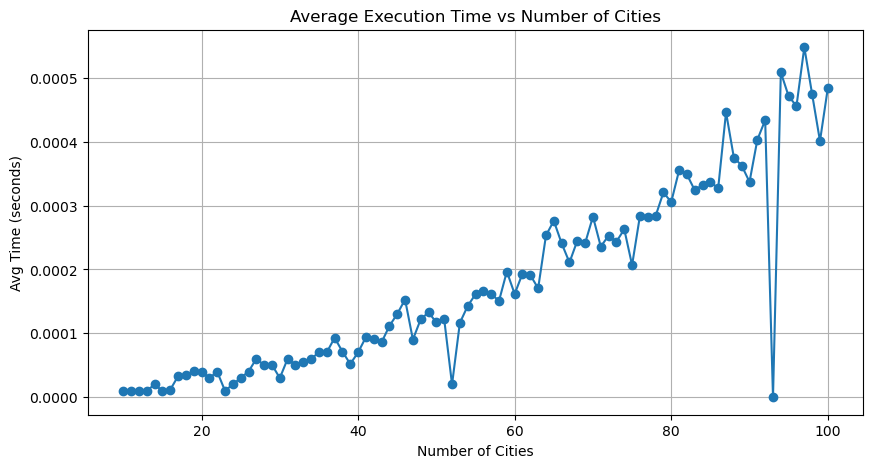

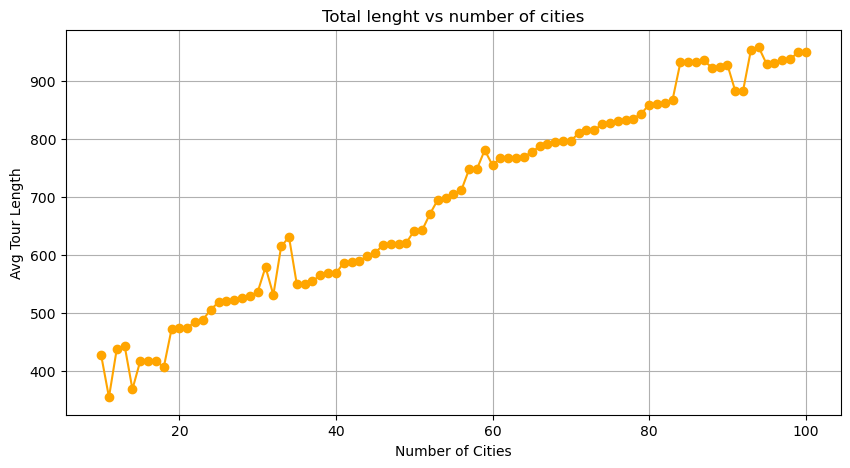

In [42]:
import random
import time
import math
import matplotlib.pyplot as plt
import pandas as pd


random.seed(101)

def generate_coordinates(num_cities, x_range=(0, 100), y_range=(0, 100)):
    return [(random.uniform(*x_range), random.uniform(*y_range)) for _ in range(num_cities)]

def compute_distance_matrix(coords):
    num_cities = len(coords)
    matrix = [[0]*num_cities for _ in range(num_cities)]
    for i in range(num_cities):
        for j in range(i+1, num_cities):
            dist = math.dist(coords[i], coords[j])
            matrix[i][j] = matrix[j][i] = dist
    return matrix

def nearest_neighbour_tsp(distance_matrix, start=0):
    num_cities = len(distance_matrix)
    visited = [False] * num_cities
    path = [start]
    total_distance = 0
    current = start
    visited[current] = True

    for _ in range(num_cities - 1):
        nearest = None
        nearest_distance = float('inf')
        for city in range(num_cities):
            if not visited[city] and 0 < distance_matrix[current][city] < nearest_distance:
                nearest = city
                nearest_distance = distance_matrix[current][city]
        path.append(nearest)
        total_distance += nearest_distance
        visited[nearest] = True
        current = nearest

    total_distance += distance_matrix[current][start]
    path.append(start)
    return path, total_distance


trials_per_size = 100
results = []

for num_cities in range(10, 101, 1):
    times = []
    lengths = []

    for trial in range(trials_per_size):
        random.seed(101) 
        coords = generate_coordinates(num_cities)
        distance_matrix = compute_distance_matrix(coords)

        start_time = time.time()
        path, cost = nearest_neighbour_tsp(distance_matrix)
        end_time = time.time()

        times.append(end_time - start_time)
        lengths.append(cost)

    results.append({
        "Number of Cities": num_cities,
        "Avg Total Length": sum(lengths) / trials_per_size,
        "Avg Time (s)": sum(times) / trials_per_size
    })


df = pd.DataFrame(results)
df.to_csv("nn_tsp_avg_results.csv", index=False)


plt.figure(figsize=(10, 5))
plt.plot(df["Number of Cities"], df["Avg Time (s)"], marker='o')
plt.title("Average Execution Time vs Number of Cities")
plt.xlabel("Number of Cities")
plt.ylabel("Avg Time (seconds)")
plt.grid(True)
plt.savefig("nn_tsp_avg_time.png", dpi=100, bbox_inches='tight')


plt.figure(figsize=(10, 5))
plt.plot(df["Number of Cities"], df["Avg Total Length"], marker='o', color='orange')
plt.title("Total lenght vs number of cities")
plt.xlabel("Number of Cities")
plt.ylabel("Avg Tour Length")
plt.grid(True)
plt.savefig("nn_tsp_avg_length.png", dpi=100, bbox_inches='tight')


In [60]:
def plot_tsp(coords, path, filename=None):
    x = [coords[i][0] for i in path]
    y = [coords[i][1] for i in path]

    plt.figure(figsize=(8, 6))
    

    plt.plot(x, y, 'o-', label='Nearest Neighbour Path', color='blue')


    for i, (xi, yi) in enumerate(coords):
        plt.scatter(xi, yi, color='black', zorder=3)
        plt.text(xi + 0.5, yi + 0.5, str(i), fontsize=9)

    start_idx = path[0]
    plt.scatter([coords[start_idx][0]], [coords[start_idx][1]], color='green', s=100, label='Start', zorder=4)

    plt.title("TSP - Nearest Neighbour Solution")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)


    if filename:
        plt.savefig(filename, dpi=100, bbox_inches='tight')
    plt.show()

Path: [0, 9, 8, 30, 20, 45, 29, 15, 49, 22, 47, 34, 6, 31, 19, 41, 27, 13, 14, 12, 11, 48, 32, 26, 16, 17, 18, 5, 35, 2, 39, 28, 36, 38, 21, 7, 44, 37, 46, 43, 42, 4, 24, 3, 1, 10, 33, 40, 25, 23, 0]
Total cost: 778.5149374346457
Time taken: 0.000000 seconds


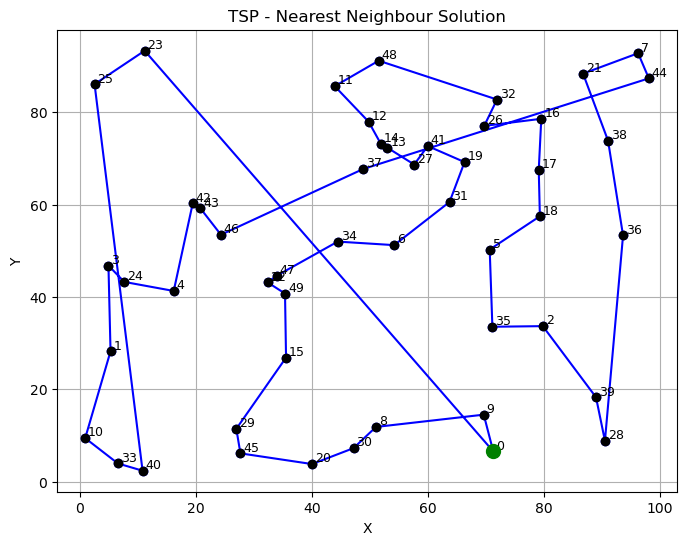

In [61]:
num_cities = 50
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
path, cost = nearest_neighbour_tsp(distance_matrix)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path,filename='50_NN.png')